INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: CrawlerBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 129
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 20
        Vector Action descriptions: , , , , , , , , , , , , , , , , , , , 


Number of agents: 12
Size of each action: 20
There are 12 agents. Each observes a state with length: 129
Episode 100	Average Score: 0.53
Episode 200	Average Score: 0.99
Episode 300	Average Score: 0.70
Episode 400	Average Score: 0.63
Episode 500	Average Score: 0.68
Episode 600	Average Score: 0.71
Episode 700	Average Score: 0.72
Episode 800	Average Score: 0.71
Episode 900	Average Score: 0.74
Episode 1000	Average Score: 0.79
Episode 1100	Average Score: 0.92
Episode 1200	Average Score: 1.02
Episode 1300	Average Score: 1.41
Episode 1400	Average Score: 1.37
Episode 1500	Average Score: 1.79
Episode 1600	Average Score: 2.16
Episode 1700	Average Score: 2.77
Episode 1800	Average Score: 2.57
Episode 1900	Average Score: 3.58
Episode 2000	Average Score: 3.49
Episode 2100	Average Score: 3.70
Episode 2200	Average Score: 5.23
Episode 2300	Average Score: 6.38
Episode 2400	Average Score: 6.46
Episode 2500	Average Score: 5.45
Episode 2600	Average Score: 5.71
Episode 2700	Average Score: 8.55
Episode 2800	

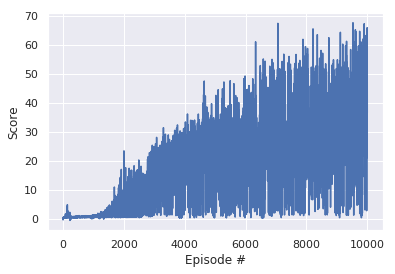

In [1]:
from unityagents import UnityEnvironment
import numpy as np
from collections import deque
import torch
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
from IPython import display

from ddpg_agent import Agents


# env = UnityEnvironment(file_name='./Crawler_Mac.app')
env = UnityEnvironment(file_name='./Crawler_Linux/Crawler.x86_64')

brain_name = env.brain_names[0]
brain = env.brains[brain_name]

env_info = env.reset(train_mode=True)[brain_name]
num_agents = len(env_info.agents)
action_size = brain.vector_action_space_size
states = env_info.vector_observations
state_size = states.shape[1]

print('Number of agents:', num_agents)
print('Size of each action:', action_size)
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))

agent = Agents(state_size=state_size, action_size=action_size, num_agents=num_agents, random_seed=0)


def ddpg(n_episodes=10000, max_t=1000):
    scores_deque = deque(maxlen=100)
    scores = []
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations
        agent.reset()
        score = np.zeros(num_agents)
        for t in range(max_t):
            action = agent.act(state)
            env_info = env.step(action)[brain_name]
            next_state = env_info.vector_observations
            rewards = env_info.rewards
            dones = env_info.local_done
            agent.step(state, action, rewards, next_state, dones)
            state = next_state
            score += rewards
            if np.any(dones):
                break 
        scores_deque.append(np.mean(score))
        scores.append(np.mean(score))
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor_crawler.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic_crawler.pth')   
    return scores

scores = ddpg()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

env.close()